<a href="https://colab.research.google.com/github/ia4226/Meat_Quality/blob/main/meat_accuracy_correct_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# Cell 1
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import greycomatrix, greycoprops
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [17]:
# Cell 2
# Define function to read and preprocess image files
def read_images(folder_path):
    image_data = []
    for filename in os.listdir(folder_path):
        if filename.endswith((".jpg", ".jpeg")):
            img = cv2.imread(os.path.join(folder_path, filename))
            # Preprocess image if necessary (e.g., resize, normalize, etc.)
            # img = cv2.resize(img, (desired_width, desired_height))
            # img = img / 255.0  # Normalize pixel values to [0, 1]
            image_data.append(img)
    return image_data


In [18]:
# Cell 3
# Read fresh meat images
fresh_meat_data = read_images('/content/drive/MyDrive/DIP_research/Fresh')

# Read spoiled meat images
spoiled_meat_data = read_images('/content/drive/MyDrive/DIP_research/Spoiled')


In [19]:
# Cell 4
# Define function to analyze color
def analyze_color(image):
    mean_color = np.mean(image, axis=(0, 1))
    return mean_color


In [20]:
# Cell 5
# Define function to analyze texture
def analyze_texture(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    glcm = greycomatrix(gray_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    contrast = greycoprops(glcm, 'contrast')[0, 0]
    energy = greycoprops(glcm, 'energy')[0, 0]
    return contrast, energy


In [21]:
# Cell 6
# Define function to analyze pixel intensity
def analyze_pixel_intensity(image):
    mean_intensity = np.mean(image)
    std_intensity = np.std(image)
    return mean_intensity, std_intensity


In [22]:
# Cell 7
# Extract features from a single image
def extract_features(image):
    color_features = analyze_color(image)
    texture_features = analyze_texture(image)
    intensity_features = analyze_pixel_intensity(image)
    return np.concatenate((color_features, texture_features, intensity_features))


In [23]:
# Cell 8
# Extract features from fresh and spoiled meat data
X_fresh = [extract_features(img) for img in fresh_meat_data]
X_spoiled = [extract_features(img) for img in spoiled_meat_data]

# Convert lists to NumPy arrays
X_fresh = np.array(X_fresh)
X_spoiled = np.array(X_spoiled)


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1

In [24]:
# Cell 9
# Combine features and labels
X = np.concatenate((X_fresh, X_spoiled), axis=0)
y = np.concatenate((np.zeros(len(X_fresh)), np.ones(len(X_spoiled))), axis=0)


In [25]:
# Cell 10
# Scale the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [26]:
# Cell 11
# Train SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_scaled, y)


SVC()

In [27]:
# Cell 12
# Train Gradient Boosting model
gbm_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm_model.fit(X_scaled, y)


GradientBoostingClassifier(random_state=42)

Enter the path to image 1: /content/drive/MyDrive/DIP_research/Fresh/test_20171016_104321D.jpg
Enter the path to image 2: /content/drive/MyDrive/DIP_research/Spoiled/test_20171017_190121D.jpg
Enter the path to image 3: /content/drive/MyDrive/DIP_research/fm2.jpeg


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')


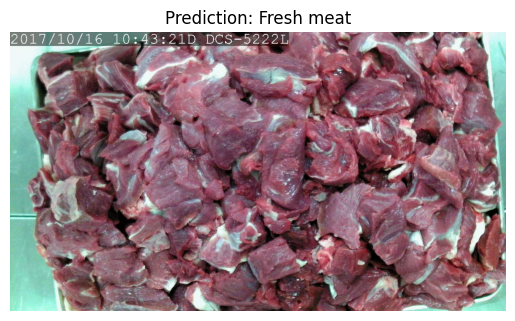

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')


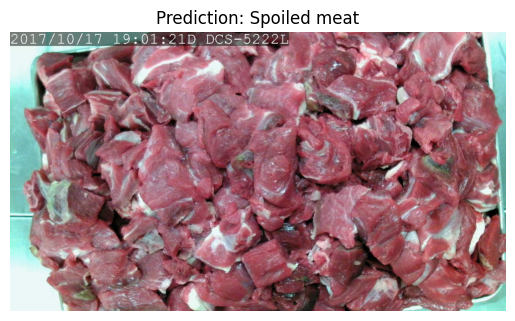

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')


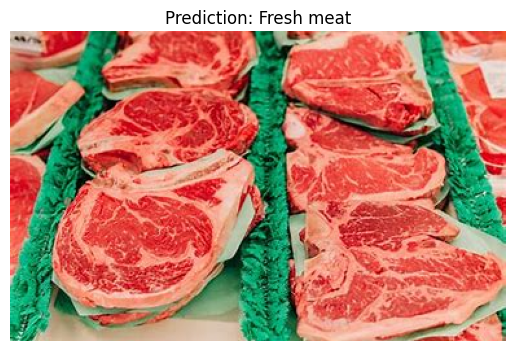

In [30]:
# Ask for three image paths
image_paths = []
for i in range(3):
    image_path = input("Enter the path to image {}: ".format(i+1))
    image_paths.append(image_path)

# Process and display the images
for image_path in image_paths:
    img = mpimg.imread(image_path)

    # Extract features from the image
    random_image_features = extract_features(img)
    random_image_scaled = scaler.transform(random_image_features.reshape(1, -1))

    # Predict freshness using SVM
    prediction_svm = svm_model.predict(random_image_scaled)
    # Predict freshness using GBM
    prediction_gbm = gbm_model.predict(random_image_scaled)

    # Determine the final prediction based on the mode of predictions
    final_prediction = np.round(np.mean([prediction_svm, prediction_gbm]))

    # Display the image and prediction
    plt.imshow(img)
    plt.axis('off')
    plt.title("Prediction: " + ("Fresh meat" if final_prediction == 0 else "Spoiled meat"))
    plt.show()


In [ ]:
model_path = '/content/drive/My Drive/path_to_your_model/meat_accuracy_correct_code.h5'
